# Assignment

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

Sample of first 20 results: [1 3 2 2 1 1 0 2 2 2 0 3 2 1 1 1 1 2 1 1]
Unique values and their counts:
0 heads: 1278 times (0.1278 probability)
1 heads: 3798 times (0.3798 probability)
2 heads: 3728 times (0.3728 probability)
3 heads: 1196 times (0.1196 probability)


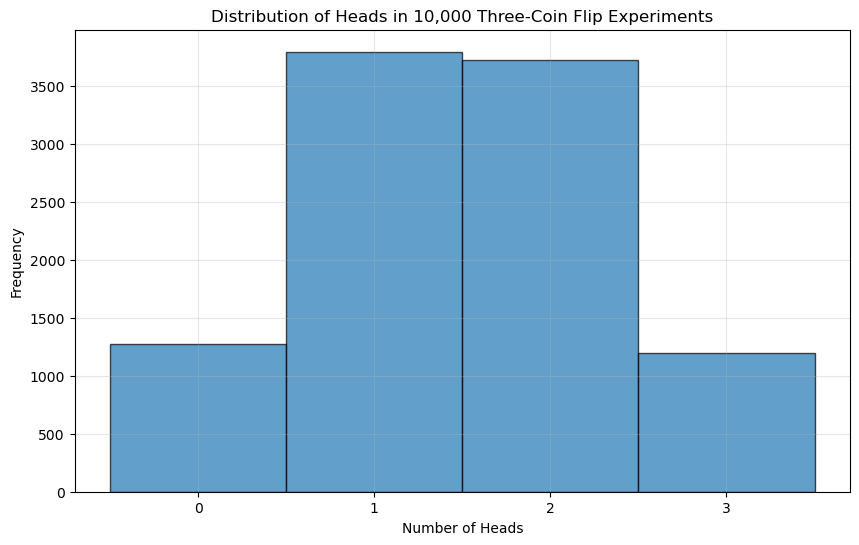


Empirical Expected Value (Mean): 1.4842

Comparison of Empirical vs Theoretical Results:
Heads | Empirical Prob | Theoretical Prob | Difference
-------------------------------------------------------
  0   |     0.1278     |      0.1250      |   0.0028
  1   |     0.3798     |      0.3750      |   0.0048
  2   |     0.3728     |      0.3750      |   0.0022
  3   |     0.1196     |      0.1250      |   0.0054

Theoretical Expected Value: 1.5000
Difference from empirical: 0.0158


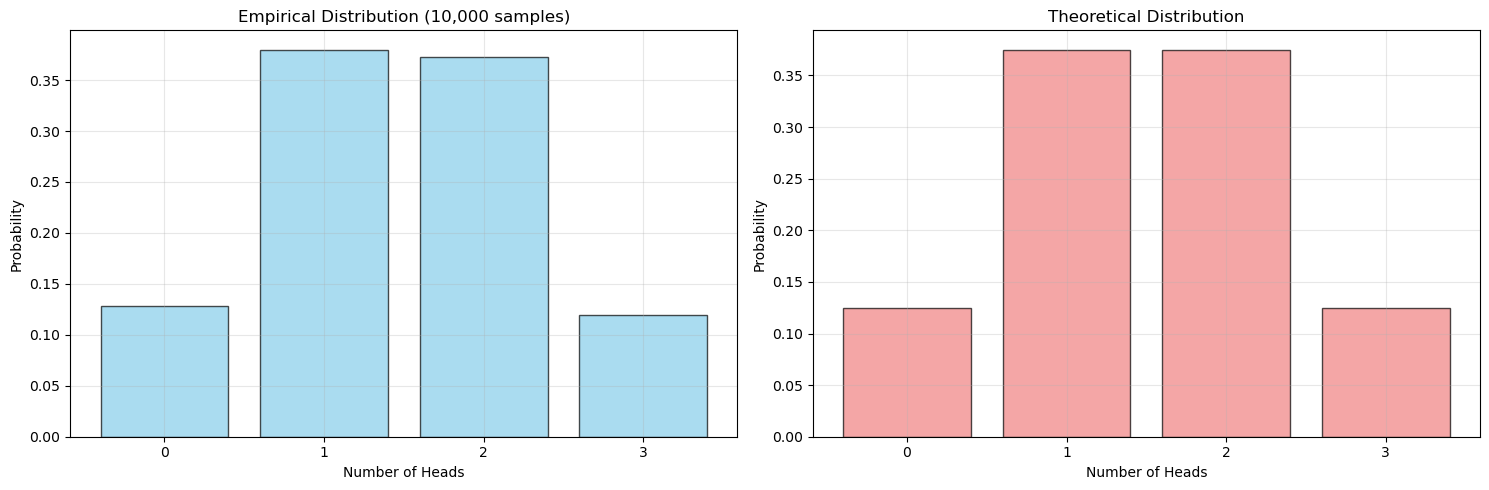

In [5]:
# Question 1: Probability and Expected Value

# Generate two samples from normal distributions
np.random.seed(42)  # For reproducibility

# Generate 10,000 random samples of flipping 3 coins
# n=3 (number of coins), p=0.5 (probability of heads), size=10000 (number of experiments)
coin_flips = np.random.binomial(n=3, p=0.5, size=10000)

print("Sample of first 20 results:", coin_flips[:20])
print("Unique values and their counts:")
unique, counts = np.unique(coin_flips, return_counts=True)
for val, count in zip(unique, counts):
    print(f"{val} heads: {count} times ({count/10000:.4f} probability)")

# Plot the probability distribution
plt.figure(figsize=(10, 6))
plt.hist(coin_flips, bins=[-.5, 0.5, 1.5, 2.5, 3.5], alpha=0.7, edgecolor='black')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Distribution of Heads in 10,000 Three-Coin Flip Experiments')
plt.xticks([0, 1, 2, 3])
plt.grid(True, alpha=0.3)
plt.show()

# Calculate the expected value (mean) of the distribution
empirical_mean = np.mean(coin_flips)
print(f"\nEmpirical Expected Value (Mean): {empirical_mean:.4f}")

# Compare with theoretical probabilities
from math import comb

print("\nComparison of Empirical vs Theoretical Results:")
print("Heads | Empirical Prob | Theoretical Prob | Difference")
print("-" * 55)

theoretical_probs = []
for k in range(4):  # 0, 1, 2, 3 heads
    # Theoretical probability using binomial formula: C(n,k) * p^k * (1-p)^(n-k)
    theoretical_prob = comb(3, k) * (0.5**k) * (0.5**(3-k))
    theoretical_probs.append(theoretical_prob)
    
    empirical_prob = np.sum(coin_flips == k) / 10000
    difference = abs(empirical_prob - theoretical_prob)
    
    print(f"  {k}   |     {empirical_prob:.4f}     |      {theoretical_prob:.4f}      |   {difference:.4f}")

# Theoretical expected value
theoretical_mean = 3 * 0.5  # n * p for binomial distribution
print(f"\nTheoretical Expected Value: {theoretical_mean:.4f}")
print(f"Difference from empirical: {abs(empirical_mean - theoretical_mean):.4f}")

# Create side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Empirical distribution
empirical_probs = [np.sum(coin_flips == k) / 10000 for k in range(4)]
ax1.bar(range(4), empirical_probs, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Probability')
ax1.set_title('Empirical Distribution (10,000 samples)')
ax1.set_xticks(range(4))
ax1.grid(True, alpha=0.3)

# Theoretical distribution
ax2.bar(range(4), theoretical_probs, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Number of Heads')
ax2.set_ylabel('Probability')
ax2.set_title('Theoretical Distribution')
ax2.set_xticks(range(4))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

Sample A Statistics:
Mean: 69.48
Standard Deviation: 4.54
Size: 100

Sample B Statistics:
Mean: 73.11
Standard Deviation: 4.77
Size: 100


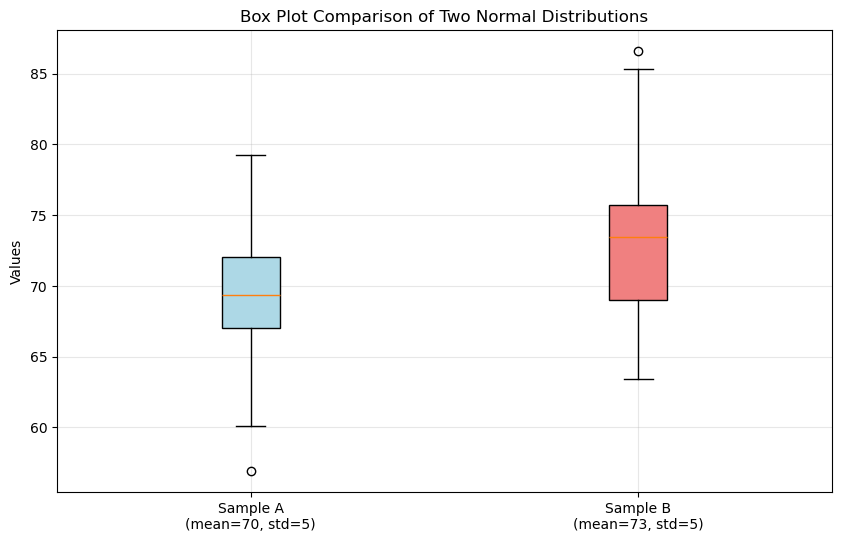


Independent T-Test Results:
T-statistic: -5.5140
P-value: 0.000000
Result: The means are significantly different (p < 0.05)
We reject the null hypothesis that the means are equal.

95% Confidence Intervals:
Sample A: [68.58, 70.38] (mean = 69.48)
Sample B: [72.17, 74.06] (mean = 73.11)


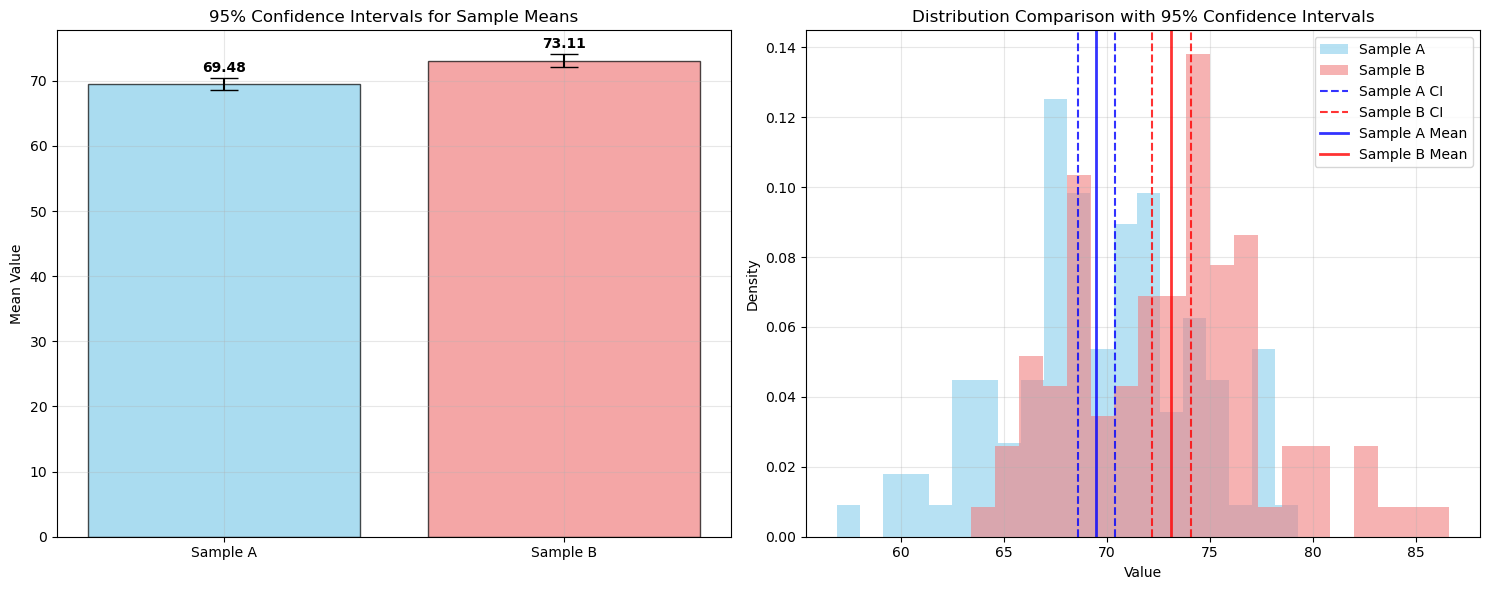


Summary:
- Sample A mean: 69.48 (95% CI: [68.58, 70.38])
- Sample B mean: 73.11 (95% CI: [72.17, 74.06])
- Difference in means: 3.63
- Statistical significance: Yes (p = 0.000000)
- Confidence intervals: Do not overlap (supporting significance)


In [6]:
# Question 2: Normal Distribution and Statistical Testing

# Generate two samples from normal distributions
np.random.seed(42)  # For reproducibility

# Sample A: 100 values with mean=70, std=5
sample_A = np.random.normal(loc=70, scale=5, size=100)

# Sample B: 100 values with mean=73, std=5  
sample_B = np.random.normal(loc=73, scale=5, size=100)

print("Sample A Statistics:")
print(f"Mean: {np.mean(sample_A):.2f}")
print(f"Standard Deviation: {np.std(sample_A, ddof=1):.2f}")
print(f"Size: {len(sample_A)}")

print("\nSample B Statistics:")
print(f"Mean: {np.mean(sample_B):.2f}")
print(f"Standard Deviation: {np.std(sample_B, ddof=1):.2f}")
print(f"Size: {len(sample_B)}")

# Create a box plot comparing the two distributions
plt.figure(figsize=(10, 6))
data_to_plot = [sample_A, sample_B]
labels = ['Sample A\n(mean=70, std=5)', 'Sample B\n(mean=73, std=5)']

box_plot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)

# Customize colors
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box Plot Comparison of Two Normal Distributions')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)
plt.show()

# Conduct an independent t-test
from scipy.stats import ttest_ind

# Perform independent t-test (assuming unequal variances - Welch's t-test)
t_stat, p_value = ttest_ind(sample_A, sample_B, equal_var=False)

print(f"\nIndependent T-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print(f"Result: The means are significantly different (p < {alpha})")
    print("We reject the null hypothesis that the means are equal.")
else:
    print(f"Result: The means are NOT significantly different (p >= {alpha})")
    print("We fail to reject the null hypothesis that the means are equal.")

# Calculate and visualize 95% confidence intervals
from scipy.stats import t

def calculate_confidence_interval(data, confidence=0.95):
    """Calculate confidence interval for sample mean"""
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    
    # Calculate t-critical value
    alpha = 1 - confidence
    t_critical = t.ppf(1 - alpha/2, df=n-1)
    
    # Calculate margin of error
    margin_error = t_critical * sem
    
    # Calculate confidence interval
    ci_lower = mean - margin_error
    ci_upper = mean + margin_error
    
    return mean, ci_lower, ci_upper, margin_error

# Calculate 95% confidence intervals for both samples
mean_A, ci_lower_A, ci_upper_A, me_A = calculate_confidence_interval(sample_A)
mean_B, ci_lower_B, ci_upper_B, me_B = calculate_confidence_interval(sample_B)

print(f"\n95% Confidence Intervals:")
print(f"Sample A: [{ci_lower_A:.2f}, {ci_upper_A:.2f}] (mean = {mean_A:.2f})")
print(f"Sample B: [{ci_lower_B:.2f}, {ci_upper_B:.2f}] (mean = {mean_B:.2f})")

# Visualize confidence intervals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Error bar plot showing confidence intervals
means = [mean_A, mean_B]
errors = [me_A, me_B]
labels_ci = ['Sample A', 'Sample B']
colors_ci = ['skyblue', 'lightcoral']

bars = ax1.bar(labels_ci, means, yerr=errors, capsize=10, 
               color=colors_ci, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Mean Value')
ax1.set_title('95% Confidence Intervals for Sample Means')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, mean, error in zip(bars, means, errors):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + error + 0.5,
             f'{mean:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Combined histogram with confidence intervals marked
ax2.hist(sample_A, bins=20, alpha=0.6, label='Sample A', color='skyblue', density=True)
ax2.hist(sample_B, bins=20, alpha=0.6, label='Sample B', color='lightcoral', density=True)

# Add vertical lines for confidence intervals
ax2.axvline(ci_lower_A, color='blue', linestyle='--', alpha=0.8, label=f'Sample A CI')
ax2.axvline(ci_upper_A, color='blue', linestyle='--', alpha=0.8)
ax2.axvline(ci_lower_B, color='red', linestyle='--', alpha=0.8, label=f'Sample B CI')
ax2.axvline(ci_upper_B, color='red', linestyle='--', alpha=0.8)

# Add vertical lines for means
ax2.axvline(mean_A, color='blue', linestyle='-', linewidth=2, alpha=0.8, label=f'Sample A Mean')
ax2.axvline(mean_B, color='red', linestyle='-', linewidth=2, alpha=0.8, label=f'Sample B Mean')

ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('Distribution Comparison with 95% Confidence Intervals')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary interpretation
print(f"\nSummary:")
print(f"- Sample A mean: {mean_A:.2f} (95% CI: [{ci_lower_A:.2f}, {ci_upper_A:.2f}])")
print(f"- Sample B mean: {mean_B:.2f} (95% CI: [{ci_lower_B:.2f}, {ci_upper_B:.2f}])")
print(f"- Difference in means: {mean_B - mean_A:.2f}")
print(f"- Statistical significance: {'Yes' if p_value < 0.05 else 'No'} (p = {p_value:.6f})")

# Check if confidence intervals overlap
if ci_upper_A >= ci_lower_B and ci_lower_A <= ci_upper_B:
    print(f"- Confidence intervals: Overlap (suggesting potential non-significance)")
else:
    print(f"- Confidence intervals: Do not overlap (supporting significance)")


3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

Iris Dataset Overview:
Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First few rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000    

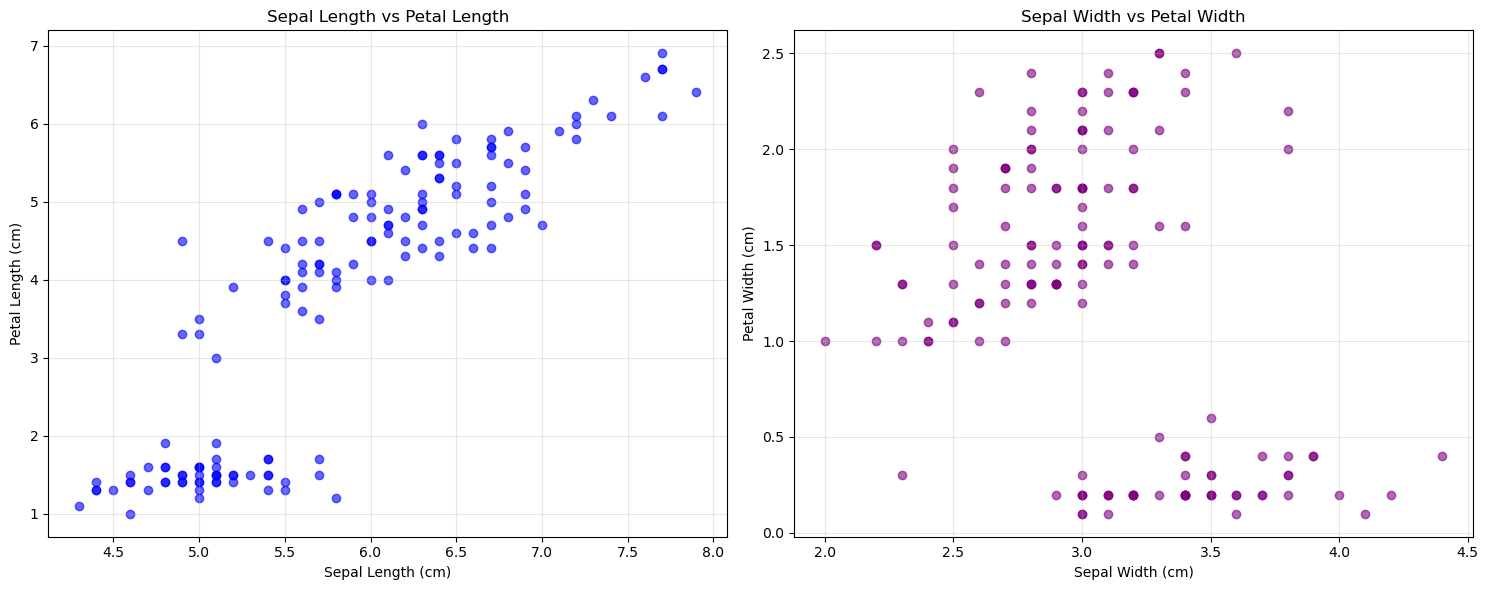


Pearson Correlation Analysis:

Pair 1 - sepal_length vs petal_length:
Correlation coefficient (r): 0.8718
P-value: 1.04e-47
Significance: Significant (α = 0.05)

Pair 2 - sepal_width vs petal_width:
Correlation coefficient (r): -0.3661
P-value: 4.07e-06
Significance: Significant (α = 0.05)

R-squared Analysis:

Pair 1 - sepal_length vs petal_length:
R-squared (r²): 0.7600
Interpretation: 76.00% of the variance in petal_length is explained by sepal_length

Pair 2 - sepal_width vs petal_width:
R-squared (r²): 0.1340
Interpretation: 13.40% of the variance in petal_width is explained by sepal_width

Comparison of Relationships:
- Sepal Length vs Petal Length: r = 0.8718, r² = 0.7600
- Sepal Width vs Petal Width: r = -0.3661, r² = 0.1340

Which pair shows a stronger relationship?
Answer: Sepal Length vs Petal Length

Explanation:
- Sepal Length vs Petal Length has a higher absolute correlation coefficient: |0.8718|
- It also has a higher R-squared value: 0.7600
- This means 76.0% of the va

In [8]:
# Question 3: Correlation Analysis

# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

print("Iris Dataset Overview:")
print(f"Shape: {iris.shape}")
print(f"Columns: {iris.columns.tolist()}")
print("\nFirst few rows:")
print(iris.head())

print("\nDataset Statistics:")
print(iris.describe())

# Define the variable pairs for analysis
pair1_x, pair1_y = 'sepal_length', 'petal_length'
pair2_x, pair2_y = 'sepal_width', 'petal_width'

print(f"\nAnalyzing relationships between:")
print(f"Pair 1: {pair1_x} vs {pair1_y}")
print(f"Pair 2: {pair2_x} vs {pair2_y}")

# Create scatter plots for both pairs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pair 1: Sepal Length vs Petal Length
ax1.scatter(iris[pair1_x], iris[pair1_y], alpha=0.6, color='blue')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_title('Sepal Length vs Petal Length')
ax1.grid(True, alpha=0.3)

# Pair 2: Sepal Width vs Petal Width
ax2.scatter(iris[pair2_x], iris[pair2_y], alpha=0.6, color='purple')
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Sepal Width vs Petal Width')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficients and p-values
from scipy.stats import pearsonr

# Pair 1: Sepal Length vs Petal Length
corr1, p_value1 = pearsonr(iris[pair1_x], iris[pair1_y])

# Pair 2: Sepal Width vs Petal Width  
corr2, p_value2 = pearsonr(iris[pair2_x], iris[pair2_y])

print(f"\nPearson Correlation Analysis:")
print(f"\nPair 1 - {pair1_x} vs {pair1_y}:")
print(f"Correlation coefficient (r): {corr1:.4f}")
print(f"P-value: {p_value1:.2e}")
print(f"Significance: {'Significant' if p_value1 < 0.05 else 'Not significant'} (α = 0.05)")

print(f"\nPair 2 - {pair2_x} vs {pair2_y}:")
print(f"Correlation coefficient (r): {corr2:.4f}")
print(f"P-value: {p_value2:.2e}")
print(f"Significance: {'Significant' if p_value2 < 0.05 else 'Not significant'} (α = 0.05)")

# Calculate and interpret R-squared values
r_squared1 = corr1 ** 2
r_squared2 = corr2 ** 2

print(f"\nR-squared Analysis:")
print(f"\nPair 1 - {pair1_x} vs {pair1_y}:")
print(f"R-squared (r²): {r_squared1:.4f}")
print(f"Interpretation: {r_squared1*100:.2f}% of the variance in {pair1_y} is explained by {pair1_x}")

print(f"\nPair 2 - {pair2_x} vs {pair2_y}:")
print(f"R-squared (r²): {r_squared2:.4f}")
print(f"Interpretation: {r_squared2*100:.2f}% of the variance in {pair2_y} is explained by {pair2_x}")

# Which pair shows a stronger relationship?
print(f"\nComparison of Relationships:")
print(f"- Sepal Length vs Petal Length: r = {corr1:.4f}, r² = {r_squared1:.4f}")
print(f"- Sepal Width vs Petal Width: r = {corr2:.4f}, r² = {r_squared2:.4f}")

if abs(corr1) > abs(corr2):
    stronger_pair = "Sepal Length vs Petal Length"
    stronger_corr = corr1
    stronger_r2 = r_squared1
else:
    stronger_pair = "Sepal Width vs Petal Width"
    stronger_corr = corr2
    stronger_r2 = r_squared2

print(f"\nWhich pair shows a stronger relationship?")
print(f"Answer: {stronger_pair}")
print(f"\nExplanation:")
print(f"- {stronger_pair} has a higher absolute correlation coefficient: |{stronger_corr:.4f}|")
print(f"- It also has a higher R-squared value: {stronger_r2:.4f}")
print(f"- This means {stronger_r2*100:.1f}% of the variance is explained by the linear relationship")
print(f"- The stronger correlation indicates a more predictable linear relationship between these variables")
